In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sqlite3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',500)
pd.set_option('display.expand_frame_repr',False)

In [7]:
df=pd.read_excel('World military power.xlsx')

In [ ]:
###EDA

In [8]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [10]:
df.tail()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
134,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,Venezuela,82,Venezuela,86,Venezuela,10,Venezuela,390,Venezuela,600,Venezuela,73,Venezuela,104,Venezuela,36,Venezuela,49,Venezuela,0,Venezuela,2,Venezuela,0,Venezuela,4,Venezuela,"74,50,00,000",Venezuela,"1,00,30,00,00,000",Venezuela,444,Venezuela,"20,07,000",Venezuela,"5,75,000",Venezuela,"3,00,90,00,00,000",Venezuela,"1,42,60,129",Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267
135,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,Vietnam,36,Vietnam,138,Vietnam,25,Vietnam,2615,Vietnam,2530,Vietnam,70,Vietnam,1000,Vietnam,85,Vietnam,65,Vietnam,0,Vietnam,6,Vietnam,0,Vietnam,9,Vietnam,"5,50,00,00,000",Vietnam,"96,58,00,00,000",Vietnam,45,Vietnam,"2,71,400",Vietnam,"5,25,000",Vietnam,"4,40,00,00,000",Vietnam,"5,10,43,216",Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616
136,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,Yemen,21,Yemen,61,Yemen,14,Yemen,620,Yemen,615,Yemen,20,Yemen,85,Yemen,150,Yemen,30,Yemen,0,Yemen,0,Yemen,0,Yemen,0,Yemen,"1,40,00,00,000",Yemen,"7,06,80,00,000",Yemen,57,Yemen,12260,Yemen,"1,45,000",Yemen,"3,00,00,00,000",Yemen,"1,12,66,221",Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601
137,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,Zambia,52,Zambia,27,Zambia,0,Zambia,75,Zambia,184,Zambia,0,Zambia,42,Zambia,50,Zambia,0,Zambia,0,Zambia,0,Zambia,0,Zambia,0,Zambia,"4,00,00,000",Zambia,"11,66,00,00,000",Zambia,88,Zambia,0,Zambia,21000,Zambia,0,Zambia,"61,66,905",Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043
138,Zimbabwe,1.7577,Zimbabwe,90,Zimbabwe,10,Zimbabwe,0,Zimbabwe,14,Zimbabwe,38,Zimbabwe,28,Zimbabwe,6,Zimbabwe,42,Zimbabwe,300,Zimbabwe,0,Zimbabwe,65,Zimbabwe,22,Zimbabwe,0,Zimbabwe,0,Zimbabwe,0,Zimbabwe,0,Zimbabwe,0,Zimbabwe,"10,00,00,000",Zimbabwe,"9,35,70,00,000",Zimbabwe,196,Zimbabwe,0,Zimbabwe,19500,Zimbabwe,0,Zimbabwe,"55,84,086",Zimbabwe,"1,40,30,368",Zimbabwe,"3,90,757",NaN,NaN,Zimbabwe,0,Zimbabwe,3229


In [11]:
df.shape

(139, 60)

In [12]:
df.isnull().sum()

,0
2020 ranking,0
Unnamed: 1,0
Airforce Strength,0
Unnamed: 3,0
Unnamed: 4,0
Unnamed: 5,0
Unnamed: 6,0
Unnamed: 7,0
Unnamed: 8,0
Unnamed: 9,0


In [13]:
df.describe()


,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
count,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,125,125,116,116,116,116,116,116,116,116,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,110,110,139,139,130,130
unique,139,139,139,114,139,64,139,39,139,50,139,78,139,98,139,46,139,107,139,131,139,71,139,92,139,69,125,79,116,6,116,21,116,12,116,19,139,125,139,139,139,109,139,89,139,103,139,85,139,139,139,139,139,139,110,105,139,93,130,126
top,Military Strength,Military Strength Power Index,Aircraft Strength,19,Fighter/Interceptor Strength,0,Attack Aircraft Strength,0,Transport Aircraft Fleet Strength,0,Trainer Aircraft Fleet,0,Helicopter Fleet Strength,8,Attack Helicopter Fleet Strength,0,Tank Strength,0,AFV/APC Strength,2000,Self-Propelled Artillery Strength,0,Towed Artillery Strength,0,Rocket Projector Strength,0,Navy Fleet Strengths,0,Aircraft Carrier Fleet Strength,0,Submarine Fleet Strength,0,Destroyer Fleet Strength,0,Frigate Fleet Strength,0,defense spending budget,"2,50,00,00,000",External Debt,External Debt value,Airport Totals,18,Oil Production,0,Oil Consumption,18500,Proven Oil Reserves,0,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,853,Total Waterway Coverage,0,Total Border Coverage,1667
freq,1,1,1,5,1,46,1,75,1,15,1,25,1,4,1,63,1,24,1,4,1,52,1,24,1,46,1,14,1,102,1,74,1,103,1,61,1,3,1,1,1,3,1,46,1,4,1,46,1,1,1,1,1,1,1,2,1,38,1,2


In [15]:
df.columns=df.loc[0]
df.drop(0,inplace=True)

In [17]:
df=df.T.drop_duplicates().T.copy()

In [18]:
df.rename(columns={'Country/Territory':'Country'},inplace=True)

In [19]:
df.isnull().sum()

,0
0,
Military Strength,0
Military Strength Power Index,0
Aircraft Strength value,0
Fighter/Interceptor Strength value,0
Attack Aircraft Strength value,0
Transport Aircraft Fleet Strength value,0
Trainer Aircraft Fleet value,0
Helicopter Fleet Strength value,0
Attack Helicopter Fleet Strength value,0


In [26]:

# Check for typos and extra spaces in column names
columns_to_drop = ['Navy Fleet Strengths', 'Navy Fleet Strengths value',
                   'Aircraft Carrier Fleet Strength', 'Aircraft Carrier Fleet Strength value',
                   'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
                   'Frigate Fleet Strength value', 'Total Coastline Coverage',
                   'Total Coastline Coverage value', 'Total Border Coverage',
                   'Total Border Coverage value']

# Check if these columns exist in your DataFrame
print(df.columns)

# Drop the columns if they exist
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

Index(['Military Strength', 'Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage',
       'Total Coas

In [28]:
df.fillna(0,inplace=True)

In [29]:
df.isnull().sum()

,0
0,
Military Strength,0
Military Strength Power Index,0
Aircraft Strength value,0
Fighter/Interceptor Strength value,0
Attack Aircraft Strength value,0
Transport Aircraft Fleet Strength value,0
Trainer Aircraft Fleet value,0
Helicopter Fleet Strength value,0
Attack Helicopter Fleet Strength value,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [33]:
df.tail()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
134,Venezuela,0.6449,260,38,0,52,82,86,10,390,600,73,104,36,"74,50,00,000","1,00,30,00,00,000",444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",7100
135,Vietnam,0.3559,293,77,0,38,36,138,25,2615,2530,70,1000,85,"5,50,00,00,000","96,58,00,00,000",45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",17702
136,Yemen,1.2412,169,77,0,8,21,61,14,620,615,20,85,150,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",0
137,Zambia,1.6464,108,18,0,11,52,27,0,75,184,0,42,50,"4,00,00,000","11,66,00,00,000",88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",2250
138,Zimbabwe,1.7577,90,10,0,14,38,28,6,42,300,0,65,22,"10,00,00,000","9,35,70,00,000",196,0,19500,0,"55,84,086","1,40,30,368","3,90,757",0


In [34]:
##remove commas:
df.replace(',','',regex=True,inplace=True)

In [35]:
df.sample()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
31,Czechia,0.5531,95,12,16,8,15,44,15,116,682,86,85,0,2969000000,205200000000,128,2000,200000,15000000,5011174,10686269,78867,664


In [44]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,1200
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,41
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,0
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1300
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,11000
6,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,1385000000,10410000000,11,0,47500,0,1696085,3038217,29743,0
7,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,7741220,2000
8,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,3380000000,630800000000,52,14260,215000,43000000,4017691,8793370,83871,0
9,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,2805000000,17410000000,37,789300,180000,7000000000,5042346,10046516,86600,0
10,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,1415000000,52150000000,4,45000,55000,124600000,806505,1422659,760,0


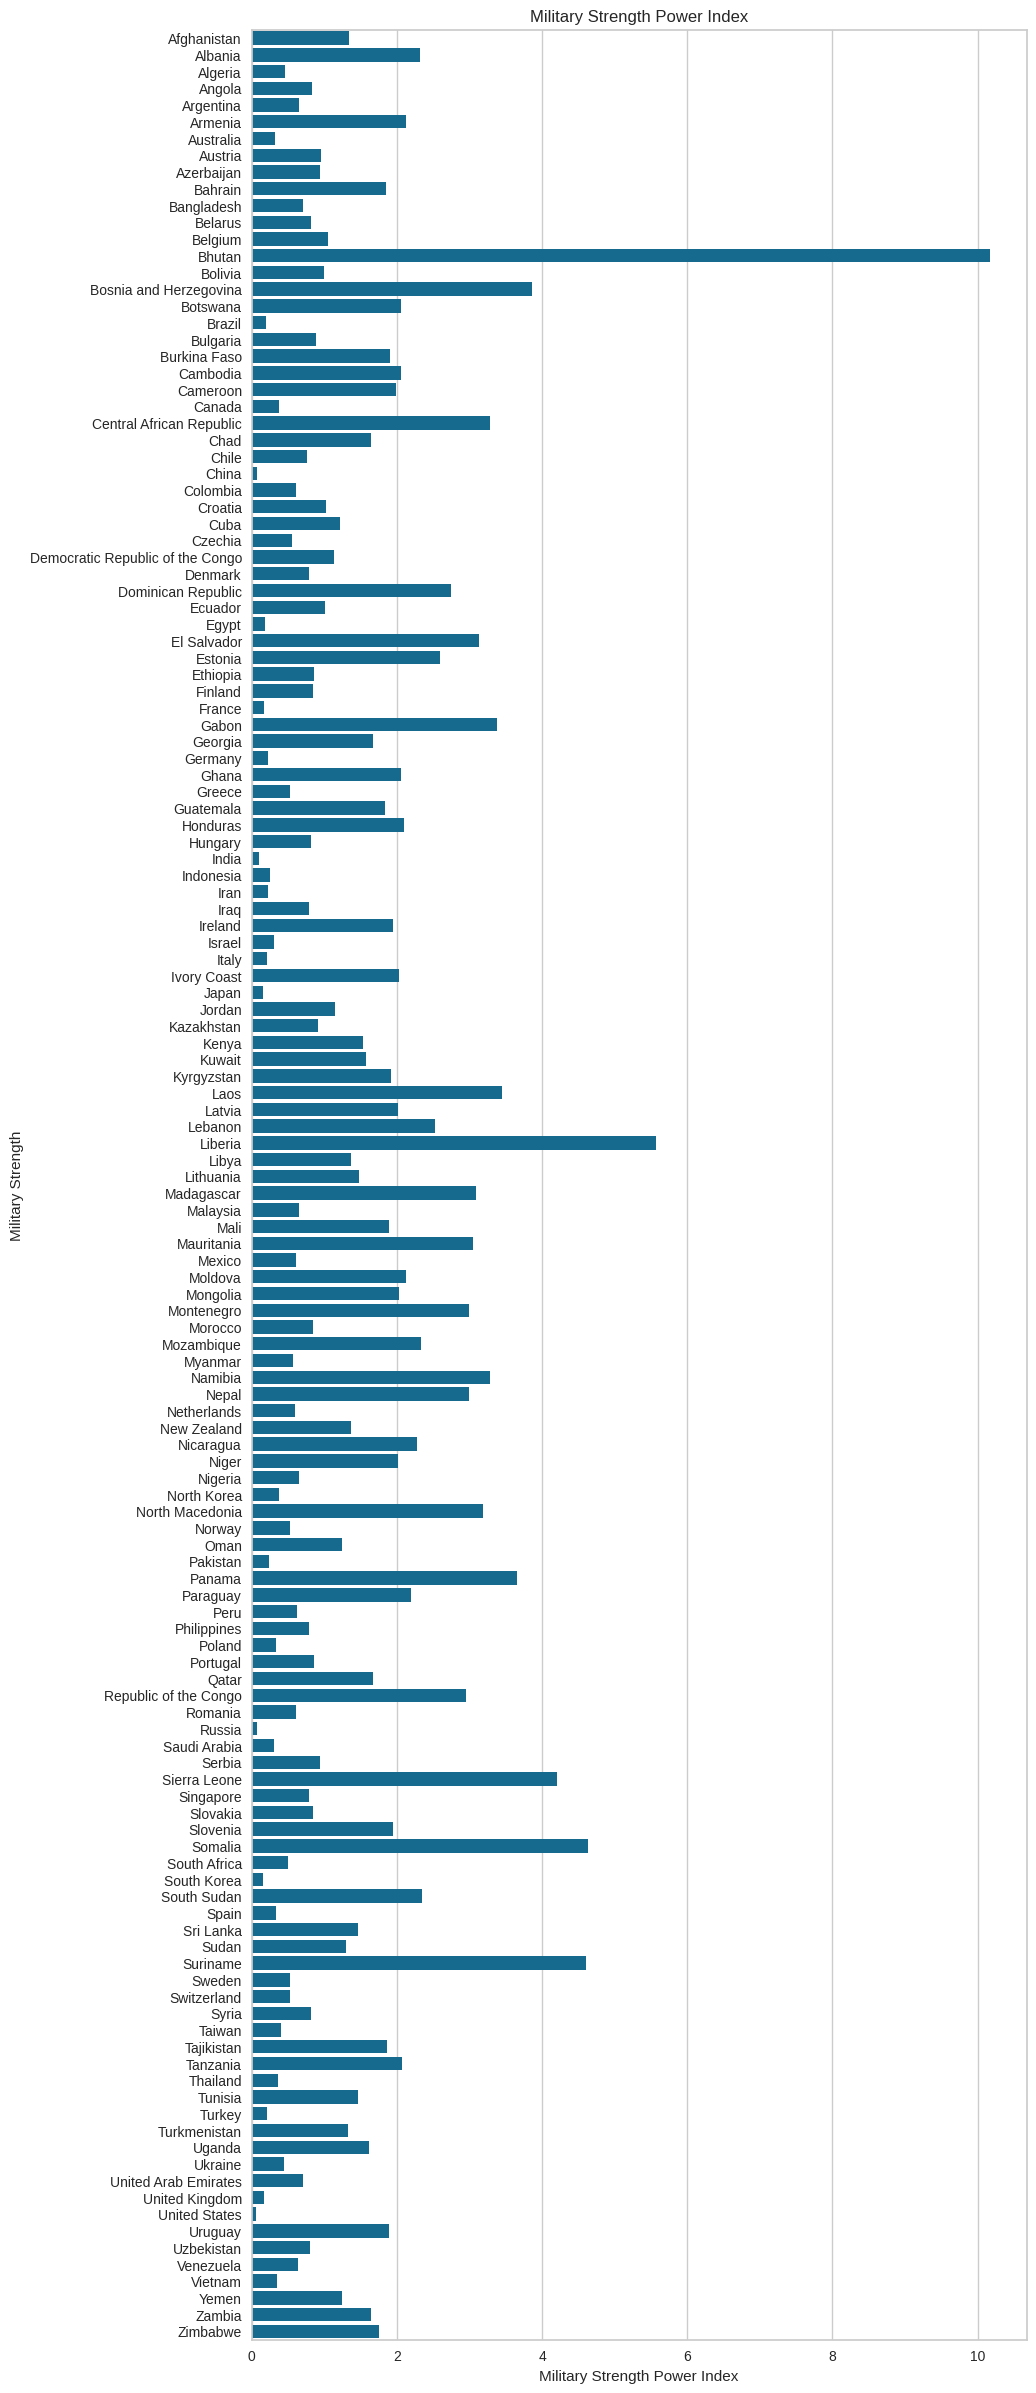

In [53]:
plt.figure(figsize=(10,30))
sns.barplot(x='Military Strength Power Index',y='Military Strength',data=df)
plt.title('Military Strength Power Index')
plt.show()

In [57]:
x=df.drop('Military Strength',axis=1)

In [60]:
model=KMeans()
model=model.fit(x)
tahmin=model.predict(x)

In [61]:
tahmin

array([0, 0, 0, 0, 0, 0, 7, 5, 0, 0, 0, 0, 7, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 5, 0, 0, 0, 5, 5, 0, 0, 3, 0, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0,
       5, 0, 3, 0, 0, 0, 5, 7, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [62]:
x['cluster']=tahmin

In [63]:
skor=silhouette_score(x,tahmin)

In [64]:
skor

0.7847423623940298

In [65]:
data=linkage(x,method='ward')

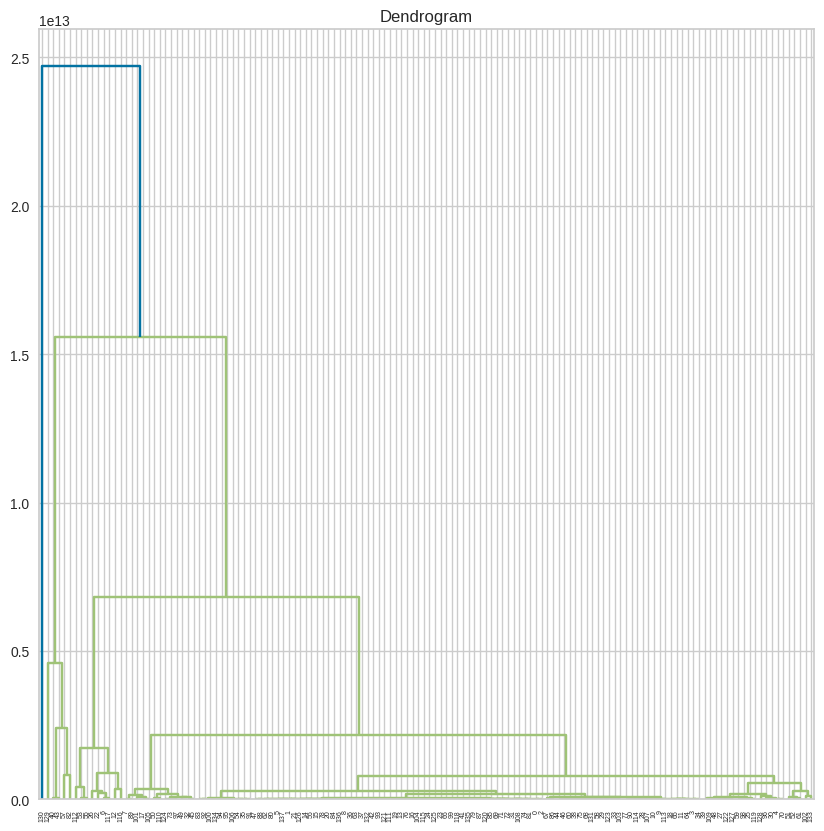

In [70]:
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
dendrogram(data)
plt.show()